In [1]:
import pprint
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from json_shot_scraper import flatten_shot, flatten_goal, flatten_complete_pass, flatten_incomplete_pass, flatten_corner
from  player_scraper import flatten_player, flatten_sub
from dataframe_cleaner import pass_to_shot, corner_to_shot, transpose_coordinates

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
with open ('data/448588.json') as f:
    data = json.load(f)
    game_id = 448588

## shot

In [4]:
shots = list(data['incidences']['shots'].items())
shot_list_dicts = [flatten_shot(shot, game_id) for shot in shots]
shot_df = pd.DataFrame(shot_list_dicts)
shot_df

,caught_by,game_id,player_id,shot_coord_x1,shot_coord_x2,shot_coord_y1,shot_coord_y2,shot_coord_z1,shot_coord_z2,shot_id,shot_type,t_half,t_min,t_sec,team_id,time_of_event(min)
0,NaN,448588,28126.0,0.75,0.99,-0.07,0.06,-1,-1.00,22822829,33,1,3,30,17,3.500000
1,NaN,448588,136947.0,-0.48,-0.99,0.02,-0.12,-1,-1.00,22822912,33,1,6,55,134,6.916667
2,NaN,448588,1325.0,-0.75,-0.99,-0.14,0.21,-1,-1.00,22822926,33,1,7,30,134,7.500000
3,49859.0,448588,118855.0,-0.43,-0.96,-0.06,0.07,-1,0.33,22822958,35,1,8,40,134,8.666667
4,NaN,448588,1325.0,-0.47,-1.00,-0.17,-0.27,-1,-1.00,22823013,33,1,10,31,134,10.516667
5,NaN,448588,54702.0,0.83,1.00,-0.14,0.08,-1,0.10,22823436,9,1,22,30,17,22.500000
6,49859.0,448588,27793.0,-0.67,-0.94,-0.36,-0.04,-1,0.08,22823456,35,1,24,1,134,24.016667
7,NaN,448588,46601.0,0.97,1.00,0.45,0.16,-1,-1.00,22823838,33,1,32,58,17,32.966667
8,NaN,448588,51413.0,0.96,1.00,-0.18,-0.11,-1,0.25,22823953,11,1,34,33,17,34.550000
9,NaN,448588,27793.0,-0.85,-0.99,0.31,-0.26,-1,-1.00,22824052,33,1,36,20,134,36.333333


## completed passes

In [5]:
completed_passes = list(data['incidences']['correctPasses'].items())
completed_list_dicts = [flatten_complete_pass(apass, game_id) for apass in completed_passes]
completed_passes_df = pd.DataFrame(completed_list_dicts)
completed_passes_df.head()

,game_id,pass_coord_x1,pass_coord_x2,pass_coord_y1,pass_coord_y2,pass_coord_z1,pass_coord_z2,pass_player,pass_type,rec_player,t_half,t_min,t_sec,team_id,time_of_event(min)
0,448588,0.05,-0.20,0.09,-0.49,-1,-1,28126.0,180,37092.0,1,0,5,17,0.083333
1,448588,-0.24,-0.09,-0.41,-0.61,-1,-1,37092.0,180,657.0,1,0,10,17,0.166667
2,448588,-0.21,-0.44,-0.81,-0.79,-1,-1,657.0,180,51413.0,1,0,11,17,0.183333
3,448588,-0.55,-0.56,-0.72,-0.41,-1,-1,51413.0,180,483.0,1,0,13,17,0.216667
4,448588,-0.67,-0.50,-0.24,0.53,-1,-1,483.0,180,153417.0,1,0,14,17,0.233333


## combine shots and passes

In [7]:
shot_pass_df = pass_to_shot(shot_df, completed_passes_df)
shot_pass_df.head()

,caught_by,game_id,player_id,shot_coord_x1,shot_coord_x2,shot_coord_y1,shot_coord_y2,shot_coord_z1,shot_coord_z2,shot_id,shot_type,t_half,t_min,t_sec,team_id,time_of_event(min),passed_from_id,pass_coord_x1,pass_coord_x2,pass_coord_y1,pass_coord_y2,pass_coord_z1,pass_coord_z2
0,NaN,448588,28126.0,0.75,0.99,-0.07,0.06,-1,-1.00,22822829,33,1,3,30,17,3.500000,54702.0,0.42,0.59,-0.50,-0.16,-1.0,-1.0
1,NaN,448588,136947.0,-0.48,-0.99,0.02,-0.12,-1,-1.00,22822912,33,1,6,55,134,6.916667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,448588,1325.0,-0.75,-0.99,-0.14,0.21,-1,-1.00,22822926,33,1,7,30,134,7.500000,118855.0,-0.71,-0.74,0.81,-0.02,-1.0,-1.0
3,49859.0,448588,118855.0,-0.43,-0.96,-0.06,0.07,-1,0.33,22822958,35,1,8,40,134,8.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,448588,1325.0,-0.47,-1.00,-0.17,-0.27,-1,-1.00,22823013,33,1,10,31,134,10.516667,136947.0,-0.34,-0.63,-0.42,-0.06,-1.0,-1.0


## corners

In [8]:
corners = list(data['incidences']['cornerKicks'].items())
corner_dicts = [flatten_corner(kick, game_id) for kick in corners]
corner_df = pd.DataFrame(corner_dicts)
corner_df

,ck_coord_x1,ck_coord_x2,ck_coord_y1,ck_coord_y2,ck_coord_z1,ck_coord_z2,ck_id,game_id,player_id,time_of_event(min)
0,0.98,0.87,-0.96,-0.27,-1,-1,22822882,448588,63477.0,5.500000
1,-0.97,-0.83,-0.98,-0.90,-1,-1,22823224,448588,118855.0,16.400000
2,0.99,0.82,-0.93,-0.34,-1,-1,22823399,448588,63477.0,21.566667
3,0.98,0.75,0.98,0.08,-1,-1,22823534,448588,63477.0,26.750000
4,-0.99,-0.82,0.98,-0.01,-1,-1,22823669,448588,118855.0,29.750000
5,-0.98,-0.82,0.98,0.06,-1,-1,22824371,448588,122082.0,40.683333
6,0.96,0.94,-0.98,-0.68,-1,-1,22824526,448588,63477.0,42.666667
7,0.97,0.78,-0.98,-0.06,-1,-1,22826167,448588,118855.0,52.816667
8,0.98,0.89,-0.95,-0.32,-1,-1,22826789,448588,118855.0,63.583333
9,0.99,0.76,-0.94,0.07,-1,-1,22826837,448588,118855.0,64.900000


## combine shots_passes with corners

In [9]:
shot_pass_corner = corner_to_shot(shot_pass_df, corner_df)
shot_pass_corner

,caught_by,game_id,player_id,shot_coord_x1,shot_coord_x2,shot_coord_y1,shot_coord_y2,shot_coord_z1,shot_coord_z2,shot_id,shot_type,t_half,t_min,t_sec,team_id,time_of_event(min),passed_from_id,pass_coord_x1,pass_coord_x2,pass_coord_y1,pass_coord_y2,pass_coord_z1,pass_coord_z2,corner_kick
0,NaN,448588,28126.0,0.75,0.99,-0.07,0.06,-1,-1.00,22822829,33,1,3,30,17,3.500000,54702.0,0.42,0.59,-0.50,-0.16,-1.0,-1.0,0.0
1,NaN,448588,136947.0,-0.48,-0.99,0.02,-0.12,-1,-1.00,22822912,33,1,6,55,134,6.916667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,448588,1325.0,-0.75,-0.99,-0.14,0.21,-1,-1.00,22822926,33,1,7,30,134,7.500000,118855.0,-0.71,-0.74,0.81,-0.02,-1.0,-1.0,0.0
3,49859.0,448588,118855.0,-0.43,-0.96,-0.06,0.07,-1,0.33,22822958,35,1,8,40,134,8.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,448588,1325.0,-0.47,-1.00,-0.17,-0.27,-1,-1.00,22823013,33,1,10,31,134,10.516667,136947.0,-0.34,-0.63,-0.42,-0.06,-1.0,-1.0,0.0
5,NaN,448588,54702.0,0.83,1.00,-0.14,0.08,-1,0.10,22823436,9,1,22,30,17,22.500000,28126.0,0.90,0.78,-0.40,-0.14,-1.0,-1.0,0.0
6,49859.0,448588,27793.0,-0.67,-0.94,-0.36,-0.04,-1,0.08,22823456,35,1,24,1,134,24.016667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,NaN,448588,46601.0,0.97,1.00,0.45,0.16,-1,-1.00,22823838,33,1,32,58,17,32.966667,63477.0,0.68,0.90,0.77,0.71,-1.0,-1.0,0.0
8,NaN,448588,51413.0,0.96,1.00,-0.18,-0.11,-1,0.25,22823953,11,1,34,33,17,34.550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,NaN,448588,27793.0,-0.85,-0.99,0.31,-0.26,-1,-1.00,22824052,33,1,36,20,134,36.333333,3173.0,-0.64,-0.82,-0.68,0.34,-1.0,-1.0,0.0


# transpose

In [10]:
transposed_df = transpose_coordinates(shot_pass_corner)

In [11]:
transposed_df

,caught_by,game_id,player_id,shot_coord_x1,shot_coord_x2,shot_coord_y1,shot_coord_y2,shot_coord_z1,shot_coord_z2,shot_id,shot_type,t_half,t_min,t_sec,team_id,time_of_event(min),passed_from_id,pass_coord_x1,pass_coord_x2,pass_coord_y1,pass_coord_y2,pass_coord_z1,pass_coord_z2,corner_kick
0,NaN,448588,28126.0,0.75,0.99,-0.07,0.06,-1,-1.00,22822829,33,1,3,30,17,3.500000,54702.0,0.42,0.59,-0.50,-0.16,-1.0,-1.0,0.0
1,NaN,448588,136947.0,0.48,0.99,-0.02,0.12,-1,-1.00,22822912,33,1,6,55,134,6.916667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,448588,1325.0,0.75,0.99,0.14,-0.21,-1,-1.00,22822926,33,1,7,30,134,7.500000,118855.0,0.71,0.74,-0.81,0.02,-1.0,-1.0,0.0
3,49859.0,448588,118855.0,0.43,0.96,0.06,-0.07,-1,0.33,22822958,35,1,8,40,134,8.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,448588,1325.0,0.47,1.00,0.17,0.27,-1,-1.00,22823013,33,1,10,31,134,10.516667,136947.0,0.34,0.63,0.42,0.06,-1.0,-1.0,0.0
5,NaN,448588,54702.0,0.83,1.00,-0.14,0.08,-1,0.10,22823436,9,1,22,30,17,22.500000,28126.0,0.90,0.78,-0.40,-0.14,-1.0,-1.0,0.0
6,49859.0,448588,27793.0,0.67,0.94,0.36,0.04,-1,0.08,22823456,35,1,24,1,134,24.016667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,NaN,448588,46601.0,0.97,1.00,0.45,0.16,-1,-1.00,22823838,33,1,32,58,17,32.966667,63477.0,0.68,0.90,0.77,0.71,-1.0,-1.0,0.0
8,NaN,448588,51413.0,0.96,1.00,-0.18,-0.11,-1,0.25,22823953,11,1,34,33,17,34.550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9,NaN,448588,27793.0,0.85,0.99,-0.31,0.26,-1,-1.00,22824052,33,1,36,20,134,36.333333,3173.0,0.64,0.82,0.68,-0.34,-1.0,-1.0,0.0


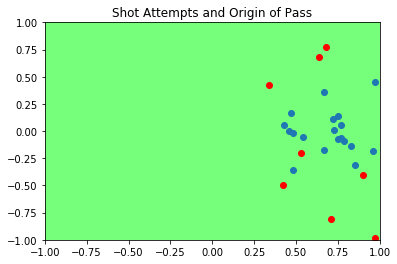

In [20]:
fig, ax = plt.subplots()
ax.scatter(transposed_df['shot_coord_x1'], transposed_df['shot_coord_y1'])
ax.scatter(transposed_df['pass_coord_x1'], transposed_df['pass_coord_y1'], color='red')
# ax.scatter(transposed_df['pass_coord_x2'], transposed_df['pass_coord_y2'], color='yellow')
ax.set_title('Shot Attempts and Origin of Pass')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_facecolor('xkcd:lightgreen')

In [14]:
goals = transposed_df[transposed_df['shot_type'].isin([9, 10, 11])].copy()

In [15]:
goals

,caught_by,game_id,player_id,shot_coord_x1,shot_coord_x2,shot_coord_y1,shot_coord_y2,shot_coord_z1,shot_coord_z2,shot_id,shot_type,t_half,t_min,t_sec,team_id,time_of_event(min),passed_from_id,pass_coord_x1,pass_coord_x2,pass_coord_y1,pass_coord_y2,pass_coord_z1,pass_coord_z2,corner_kick
5,NaN,448588,54702.0,0.83,1.00,-0.14,0.08,-1,0.10,22823436,9,1,22,30,17,22.500000,28126.0,0.90,0.78,-0.40,-0.14,-1.0,-1.0,0.0
8,NaN,448588,51413.0,0.96,1.00,-0.18,-0.11,-1,0.25,22823953,11,1,34,33,17,34.550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
12,NaN,448588,54702.0,0.67,0.98,-0.17,0.13,-1,0.18,22825994,9,2,49,18,17,49.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
13,NaN,448588,47487.0,0.77,0.99,-0.06,-0.11,-1,0.18,22826185,11,2,53,5,134,53.083333,118855.0,0.97,0.78,-0.98,-0.06,-1.0,-1.0,1.0


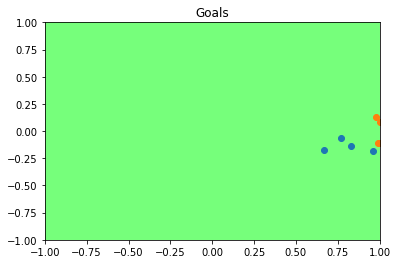

In [19]:
fig, ax = plt.subplots()
ax.scatter(goals['shot_coord_x1'], goals['shot_coord_y1'])
ax.scatter(goals['shot_coord_x2'], goals['shot_coord_y2'])
# ax.scatter(goals['pass_coord_x1'], transposed_df['pass_coord_y1'], color='red')
# ax.scatter(goals['pass_coord_x2'], transposed_df['pass_coord_y2'], color='yellow')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_title('Goals')
ax.set_facecolor('xkcd:lightgreen')